pH
This Column defines PH alus of the milk which ranges from 3 to 9.5 max : 6.25 to 6.90

Temprature
This Column defines Temprature of the milk which ranges from 34'C to 90'C max : 34'C to 45.20'C

Taste
This Column defines Taste of the milk which is categorical data 0 (Bad) or 1 (Good) max : 1 (Good)

Odor
This Column defines Odor of the milk which is categorical data 0 (Bad) or 1 (Good) max : 0 (Bad)

Fat
This Column defines Odor of the milk which is categorical data 0 (Low) or 1 (High) max : 1 (High)

Turbidity
This Column defines Turbidity of the milk which is categorical data 0 (Low) or 1 (High) max : 1 (High)

Colour
This Column defines Colour of the milk which ranges from 240 to 255 max : 255

Grade
This Column defines Grade (Target) of the milk which is categorical data Where Low (Bad) or Medium (Moderate) High

In [47]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [48]:
df=pd.read_csv('/content/milknew.csv.csv')
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [49]:
df.rename(columns={'Temprature':'Temperature'},inplace=True)
df.rename(columns={'Fat ':'Fat'},inplace=True)

In [50]:
df.head()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [51]:
df.shape

(1059, 8)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperature  1059 non-null   int64  
 2   Taste        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Fat          1059 non-null   int64  
 5   Turbidity    1059 non-null   int64  
 6   Colour       1059 non-null   int64  
 7   Grade        1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [53]:
df.describe()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [54]:
df.isna().sum()

pH             0
Temperature    0
Taste          0
Odor           0
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64

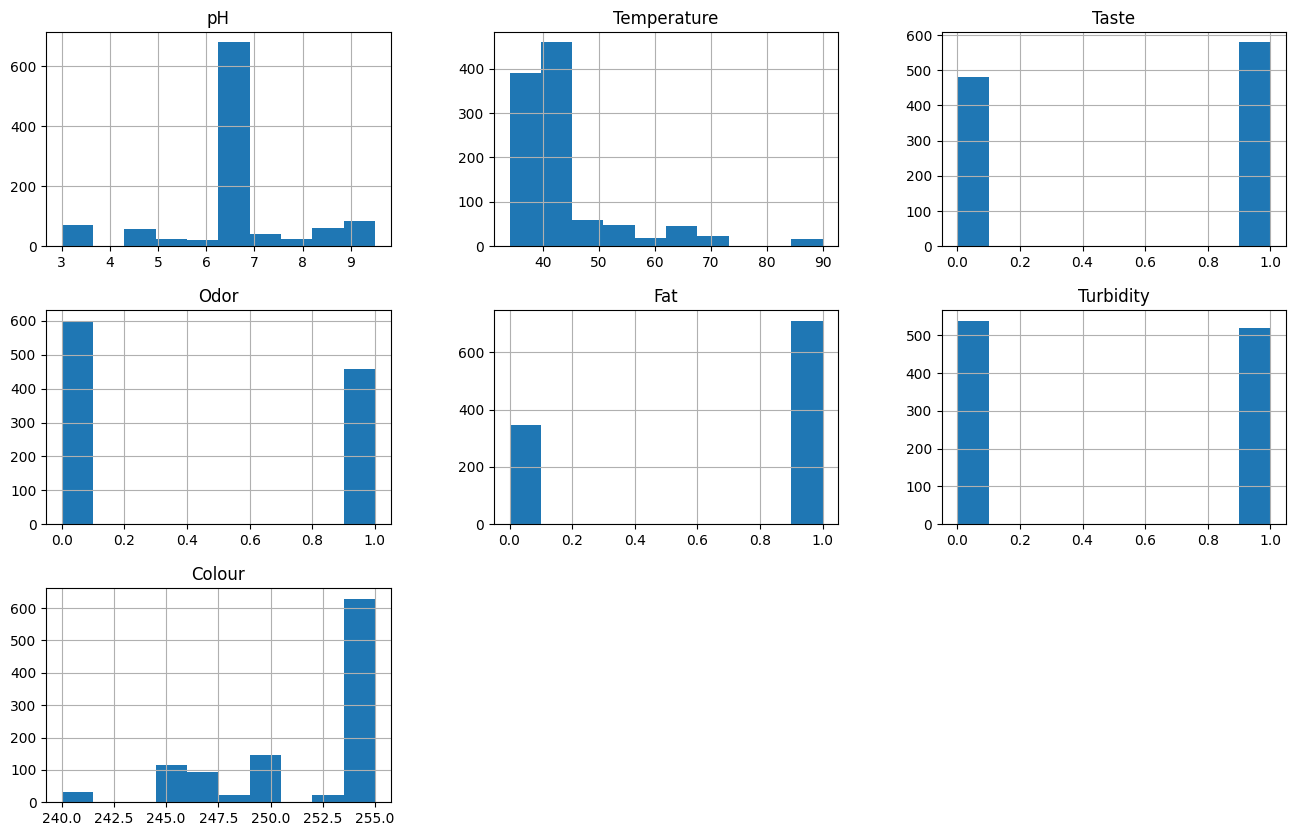

In [55]:
df.hist(figsize=(16,10))
plt.show();

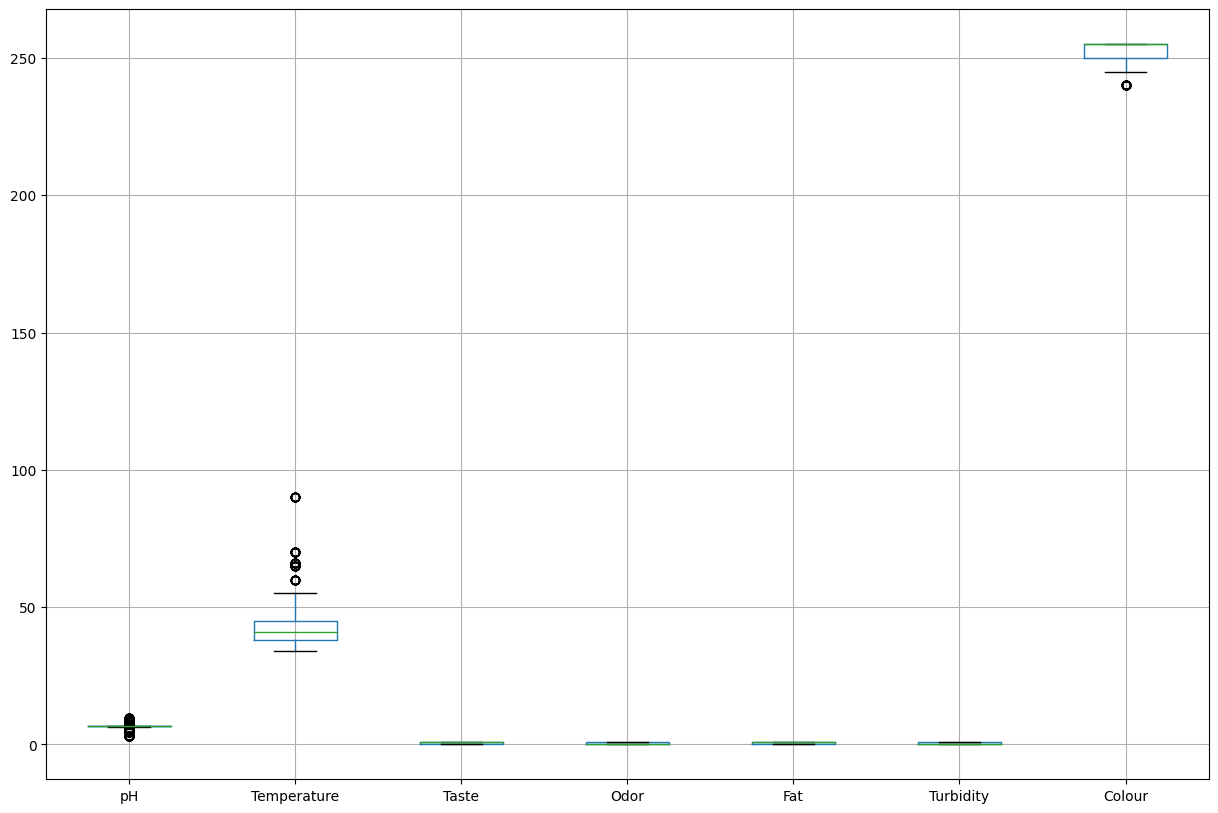

In [56]:
df.boxplot(figsize=(15,10))
plt.show()

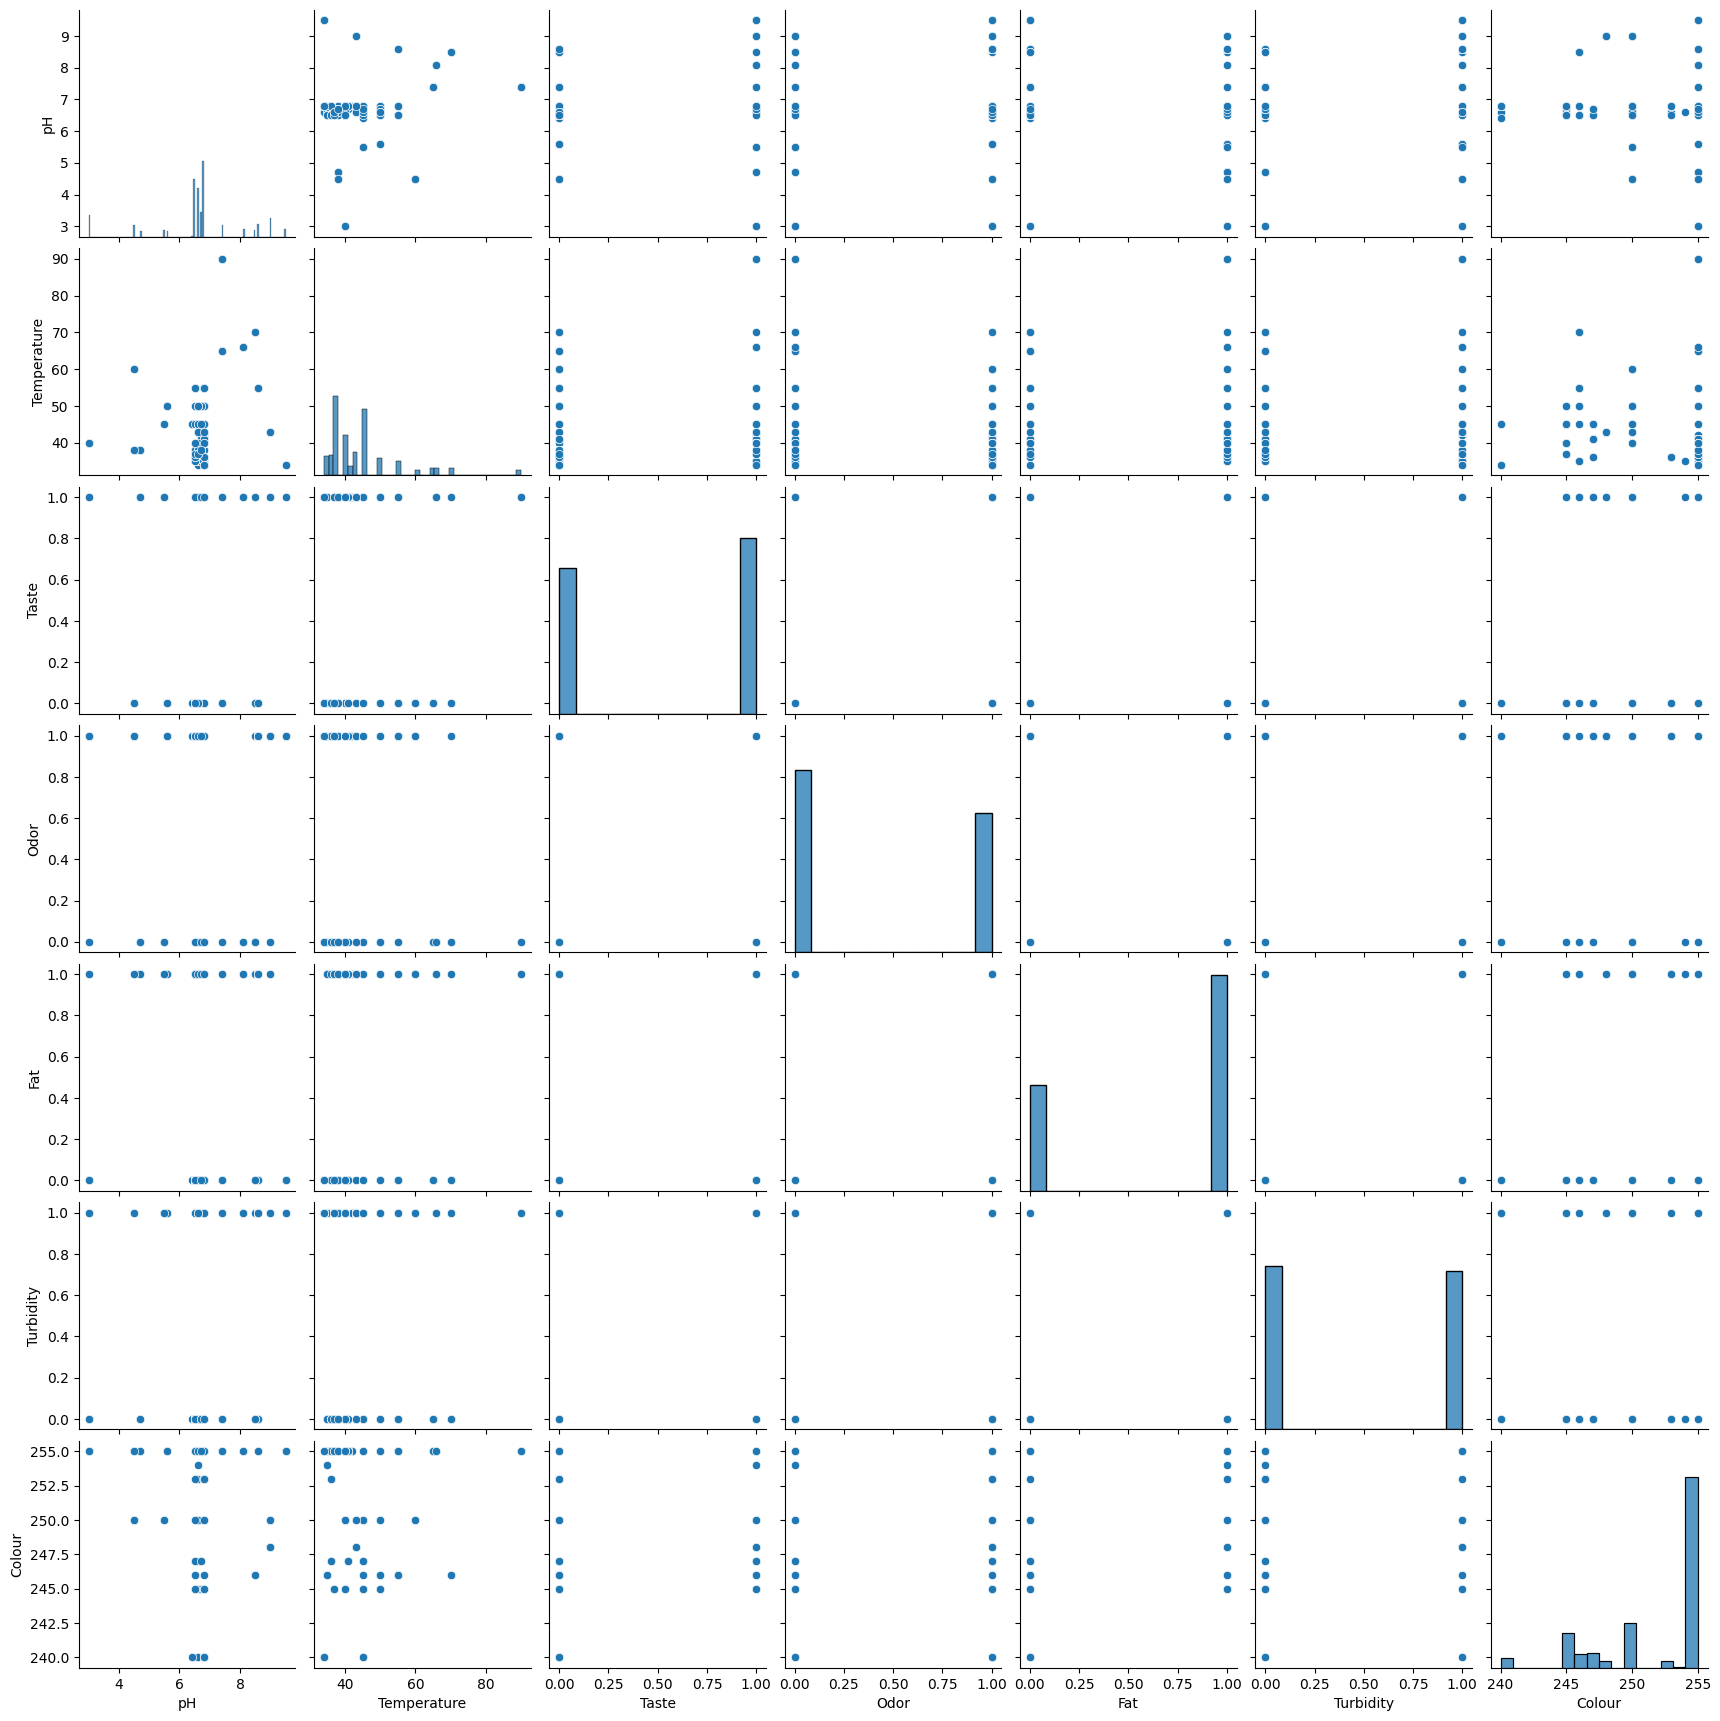

In [57]:
sns.pairplot(df)
plt.show();

In [58]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [60]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [61]:
x.shape,y.shape

((1059, 7), (1059,))

In [62]:
y=y.replace(['high','low','medium'],[0,1,2])

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,stratify=y,random_state=42)

In [64]:
x_train.shape,y_train.shape

((847, 7), (847,))

In [65]:
from sklearn.pipeline import make_pipeline

In [66]:
classifiers=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),
        AdaBoostClassifier(),XGBClassifier(),GaussianNB()]

In [67]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [68]:
mod=[]
class_report=[]
accuracy=[]
recall=[]
f1score=[]
accuracy_t=[]

In [69]:
for models in classifiers:
  model=make_pipeline(StandardScaler(),models)
  model.fit(x_train,y_train)
  y_predt=model.predict(x_train)
  acct=accuracy_score(y_train,y_predt)
  y_pred=model.predict(x_test)
  c_r=classification_report(y_test,y_pred)
  acc=accuracy_score(y_test,y_pred)
  mod.append(model)
  class_report.append(c_r)
  accuracy.append(acc)
  accuracy_t.append(acct)

In [70]:
for i in class_report:
  print(i)

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        51
           1       0.89      0.83      0.86        86
           2       0.90      0.85      0.88        75

    accuracy                           0.83       212
   macro avg       0.82      0.83      0.82       212
weighted avg       0.84      0.83      0.83       212

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        51
           1       1.00      0.91      0.95        86
           2       0.83      0.95      0.88        75

    accuracy                           0.91       212
   macro avg       0.91      0.90      0.90       212
weighted avg       0.91      0.91      0.91       212

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.99      1.00      0.99        86
           2       1.00      1.00      1.00        75

    accuracy        

In [72]:
accy=pd.DataFrame({'model':['lr','svc','dt','rf','abc','xgbc','nb'],'acc_train':accuracy_t,'accuracy':accuracy},index=np.arange(1,8))
accy.sort_values(by=['accuracy'],ascending=[False])

,model,acc_train,accuracy
3,dt,1.000000,0.995283
4,rf,1.000000,0.995283
6,xgbc,1.000000,0.995283
5,abc,0.935065,0.933962
2,svc,0.939787,0.905660
7,nb,0.825266,0.853774
1,lr,0.859504,0.830189


adaboost and svc both perform better on both training and testing

In [73]:
from sklearn.model_selection import cross_val_score

In [76]:
DT_pipeline=make_pipeline(StandardScaler(),DecisionTreeClassifier())
RF_pipeline=make_pipeline(StandardScaler(),RandomForestClassifier())
ABC_pipeline=make_pipeline(StandardScaler(),AdaBoostClassifier())
xgb_pipeline=make_pipeline(StandardScaler(),XGBClassifier())

In [77]:
for i in DT_pipeline,RF_pipeline,ABC_pipeline,xgb_pipeline:
  print(cross_val_score(i,x_train,y_train,cv=5).mean())

0.9929133310128785
0.9976331360946744
0.8914375217542638
0.9976331360946744


in cross validation evaluation svc perform better than adaboost 

In [78]:
from sklearn.model_selection import GridSearchCV

In [82]:
RF_hyperparameters={
    'randomforestclassifier__criterion': ['gini','entropy'],
    'randomforestclassifier__n_estimators': [ 100, 200],
    'randomforestclassifier__max_depth': [None, 10],
    'randomforestclassifier__min_samples_split': [5, 10],
    'randomforestclassifier__min_samples_leaf':  [4,6],
                    }

RF_grid_search = GridSearchCV(
    estimator=RF_pipeline,
    param_grid=RF_hyperparameters,
    scoring = "accuracy",
    n_jobs = -1,
    cv = 5,
    verbose=True
)

RF_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': [None, 10],
                         'randomforestclassifier__min_samples_leaf': [4, 6],
                         'randomforestclassifier__min_samples_split': [5, 10],
                         'randomforestclassifier__n_estimators': [100, 200]},
             scoring='accuracy', verbose=True)

In [83]:
print(RF_grid_search.best_estimator_)
print(RF_grid_search.best_score_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', min_samples_leaf=4,
                                        min_samples_split=10))])
0.9976331360946744


In [87]:
RF_pip=RF_grid_search.best_estimator_

In [88]:
pred=RF_pip.predict(x_test)
print(accuracy_score(y_test,pred))

0.9905660377358491


In [89]:
y=y.replace([0,1,2],['high','low','medium'])

In [90]:
RF_pip.fit(x,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', min_samples_leaf=4,
                                        min_samples_split=10))])

In [100]:
import pickle

In [101]:
pickle.dump(RF_pip,open('model.pkl','wb'))

In [102]:
model_m=pickle.load(open('model.pkl','rb'))
model_m

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', min_samples_leaf=4,
                                        min_samples_split=10))])

In [103]:
# Importing WIDGETS to Build a WIDGETS
import ipywidgets as widgets

# Importing the DISPLAY Function to Display the widgets
from IPython.display import display

In [104]:
widgets.IntSlider()

IntSlider(value=0)

In [105]:
widgets.FloatSlider()

FloatSlider(value=0.0)

In [106]:
widgets.ToggleButtons()

ToggleButtons(options=(), value=None)

In [107]:
widgets.IntSlider(
    value = 6,
    min = 3,
    max = 10,
    step = 1,
    description = 'pH:'
)
widgets.IntSlider(
    value = 41,
    min = 30,
    max = 70,
    step = 1,
    description = 'Temperature:'
)
widgets.IntSlider(
    value = 250,
    min = 240,
    max = 260,
    step = 1,
    description = 'Colour:'
)

IntSlider(value=250, description='Colour:', max=260, min=240)

In [108]:
widgets.ToggleButtons(
    options = [0,1],
    description = 'Taste: '
)
widgets.ToggleButtons(
    options = [0,1],
    description = 'Odor: '
)
widgets.ToggleButtons(
    options = [0,1],
    description = 'Fat: '
)
widgets.ToggleButtons(
    options = [0,1],
    description = 'Turbidity: '
)

ToggleButtons(description='Turbidity: ', options=(0, 1), value=0)

In [109]:
df.columns

Index(['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [110]:
ph_widgets=widgets.IntSlider(
    value = 6,
    min = 3,
    max = 10,
    step = 1,
    description = 'pH:'
)
temp_widgets=widgets.IntSlider(
    value = 41,
    min = 30,
    max = 70,
    step = 1,
    description = 'Temperature:'
)
taste_widgets=widgets.ToggleButtons(
    options = [0,1],
    description = 'Taste: '
)
odor_widgets=widgets.ToggleButtons(
    options = [0,1],
    description = 'Odor: '
)
fat_widgets=widgets.ToggleButtons(
    options = [1,0],
    description = 'Fat: '
)
turbidity_widgets=widgets.ToggleButtons(
    options = [0,1],
    description = 'Turbidity: '
)
colour_widgets=widgets.IntSlider(
    value = 250,
    min = 240,
    max = 260,
    step = 1,
    description = 'Colour:'
)



widgets.Button(
    description = 'Predict'
)

Button_widget = widgets.Button(
    description = 'Predict'
)

prediction_out = widgets.Output()


def make_prediction(btn):
  x = pd.DataFrame({
      'pH': ph_widgets.value,
      'Temperature': temp_widgets.value,
      'Taste': taste_widgets.value,
      'Odor': odor_widgets.value,
      'Fat': fat_widgets.value,
      'Turbidity': turbidity_widgets.value,
      'Colour': colour_widgets.value
  },index=[0])

  prediction = model_m.predict(x)

  with prediction_out:
    prediction_out.clear_output()
    print('the grade of milk is :',prediction)



Button_widget.on_click(make_prediction)

In [111]:
display( ph_widgets.value,temp_widgets.value,taste_widgets.value,odor_widgets.value,fat_widgets.value,
        turbidity_widgets.value,colour_widgets.value, Button_widget, prediction_out)

6

41

0

0

1

0

250

Button(description='Predict', style=ButtonStyle())

Output()